<a href="https://colab.research.google.com/github/georgesolis/portafolio/blob/main/Proyeccion_Demanda_Prendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#Instalar los paquetes necesarios:
#!pip install "pycaret[full]"
#!pip install sweetviz

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import types
import matplotlib.mlab as mlab
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import os
from sklearn.model_selection import train_test_split
from pycaret.classification import *
import sweetviz
import seaborn as sns
import time 
from datetime import date
from datetime import timedelta

In [49]:
#Obtenemos los datos
data = pd.read_csv('DemandaPrendas.csv')
data.head(10)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,MODELO,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
0,201501,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,NaN,156.99835,138.92,NaN,NaN,NaN,641
1,201502,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,NaN,124.06427,120.87,NaN,NaN,NaN,148
2,201503,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,NaN,278.67054,273.85,NaN,NaN,NaN,524
3,201504,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,NaN,254.20764,252.21,NaN,NaN,NaN,600
4,201505,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,NaN,243.58710,264.37,112.0,396.900000,NaN,186
5,201506,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,396.900000,375.51110,405.82,114.0,421.400000,112.0,504
6,201507,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,421.400000,376.62310,399.97,182.0,700.700000,114.0,506
7,201508,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,700.700000,455.99150,483.59,213.0,824.833333,182.0,381
8,201509,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,824.833333,583.05910,602.36,214.0,740.400000,213.0,1135
9,201510,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,740.400000,411.40122,435.99,164.0,536.633333,214.0,620


In [50]:
data.shape

(4680, 13)

In [51]:
data.columns.values

array(['FECDETALLE', 'CODIGO_SAP', 'TALLA', 'COLORES', 'MODELO', 'TIPO',
       'PROM_FLG_DEPARTAMENTO_1_4_U3M_M2', 'TOT_PRECIO_CDESC_M0',
       'TOT_PRECIO_M0', 'PROM_FLG_SUBCANAL_1_1_U3M_M1',
       'PROM_FLG_DEPARTAMENTO_1_4_U3M_M1', 'PROM_FLG_SUBCANAL_1_1_U3M_M2',
       'CLASS'], dtype=object)

In [52]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FECDETALLE,4680.0,201646.640171,107.597377,201501.000,201512.000000,201611.000000,201710.000000,201809.000000
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,4162.0,322.328433,468.040398,0.000,44.550000,131.953333,386.039167,3402.266667
TOT_PRECIO_CDESC_M0,4680.0,529.999730,1051.235491,4.508,69.536500,197.307600,537.780145,14701.436130
TOT_PRECIO_M0,4680.0,548.231868,1084.551578,4.900,71.843050,203.608800,550.784500,14762.849590
PROM_FLG_SUBCANAL_1_1_U3M_M1,4268.0,124.945173,197.696594,0.000,19.000000,47.000000,137.000000,1556.000000
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,4268.0,322.625974,466.693218,0.000,45.233333,132.476667,386.547755,3402.266667
PROM_FLG_SUBCANAL_1_1_U3M_M2,4162.0,125.225372,198.557014,0.000,19.000000,47.000000,136.750000,1556.000000
CLASS,4680.0,522.970085,1063.686531,1.000,49.000000,140.000000,464.000000,13804.000000


In [53]:
inputs_num = ['PROM_FLG_DEPARTAMENTO_1_4_U3M_M2', 'TOT_PRECIO_CDESC_M0',
       'TOT_PRECIO_M0', 'PROM_FLG_SUBCANAL_1_1_U3M_M1',
       'PROM_FLG_DEPARTAMENTO_1_4_U3M_M1', 'PROM_FLG_SUBCANAL_1_1_U3M_M2']

In [54]:
data[inputs_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,4162.0,322.328433,468.040398,0.000,44.550000,131.953333,386.039167,3402.266667
TOT_PRECIO_CDESC_M0,4680.0,529.999730,1051.235491,4.508,69.536500,197.307600,537.780145,14701.436130
TOT_PRECIO_M0,4680.0,548.231868,1084.551578,4.900,71.843050,203.608800,550.784500,14762.849590
PROM_FLG_SUBCANAL_1_1_U3M_M1,4268.0,124.945173,197.696594,0.000,19.000000,47.000000,137.000000,1556.000000
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,4268.0,322.625974,466.693218,0.000,45.233333,132.476667,386.547755,3402.266667
PROM_FLG_SUBCANAL_1_1_U3M_M2,4162.0,125.225372,198.557014,0.000,19.000000,47.000000,136.750000,1556.000000


In [55]:
rest_data=data[inputs_num].describe().transpose()
rest_data

,count,mean,std,min,25%,50%,75%,max
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,4162.0,322.328433,468.040398,0.000,44.550000,131.953333,386.039167,3402.266667
TOT_PRECIO_CDESC_M0,4680.0,529.999730,1051.235491,4.508,69.536500,197.307600,537.780145,14701.436130
TOT_PRECIO_M0,4680.0,548.231868,1084.551578,4.900,71.843050,203.608800,550.784500,14762.849590
PROM_FLG_SUBCANAL_1_1_U3M_M1,4268.0,124.945173,197.696594,0.000,19.000000,47.000000,137.000000,1556.000000
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,4268.0,322.625974,466.693218,0.000,45.233333,132.476667,386.547755,3402.266667
PROM_FLG_SUBCANAL_1_1_U3M_M2,4162.0,125.225372,198.557014,0.000,19.000000,47.000000,136.750000,1556.000000


In [56]:
rest_data['faltante']=(1-(rest_data['count']/data.shape[0]))*100
rest_data

,count,mean,std,min,25%,50%,75%,max,faltante
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,4162.0,322.328433,468.040398,0.000,44.550000,131.953333,386.039167,3402.266667,11.068376
TOT_PRECIO_CDESC_M0,4680.0,529.999730,1051.235491,4.508,69.536500,197.307600,537.780145,14701.436130,0.000000
TOT_PRECIO_M0,4680.0,548.231868,1084.551578,4.900,71.843050,203.608800,550.784500,14762.849590,0.000000
PROM_FLG_SUBCANAL_1_1_U3M_M1,4268.0,124.945173,197.696594,0.000,19.000000,47.000000,137.000000,1556.000000,8.803419
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,4268.0,322.625974,466.693218,0.000,45.233333,132.476667,386.547755,3402.266667,8.803419
PROM_FLG_SUBCANAL_1_1_U3M_M2,4162.0,125.225372,198.557014,0.000,19.000000,47.000000,136.750000,1556.000000,11.068376


In [57]:
data[inputs_num] = data[inputs_num].fillna(data[inputs_num].median())
data[inputs_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,4680.0,301.257001,445.396766,0.000,52.173453,131.953333,341.874285,3402.266667
TOT_PRECIO_CDESC_M0,4680.0,529.999730,1051.235491,4.508,69.536500,197.307600,537.780145,14701.436130
TOT_PRECIO_M0,4680.0,548.231868,1084.551578,4.900,71.843050,203.608800,550.784500,14762.849590
PROM_FLG_SUBCANAL_1_1_U3M_M1,4680.0,118.083333,190.079855,0.000,21.000000,47.000000,120.000000,1556.000000
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,4680.0,305.886334,448.918507,0.000,50.200000,132.476667,351.735613,3402.266667
PROM_FLG_SUBCANAL_1_1_U3M_M2,4680.0,116.567094,188.845758,0.000,22.000000,47.000000,117.000000,1556.000000


In [58]:
inputs_cat = ['TALLA', 'COLORES', 'MODELO', 'TIPO']

In [59]:
rest_cat = data[inputs_cat].describe(include='all').transpose()
rest_cat

,count,unique,top,freq
TALLA,4680,4,M,1245
COLORES,4680,15,NEGRO,630
MODELO,4680,1,PTY,4680
TIPO,3892,2,SPT,1958


In [60]:
rest_cat['faltante']=(1-(rest_cat['count']/data.shape[0]))*100
rest_cat

,count,unique,top,freq,faltante
TALLA,4680,4,M,1245,0.0
COLORES,4680,15,NEGRO,630,0.0
MODELO,4680,1,PTY,4680,0.0
TIPO,3892,2,SPT,1958,16.837607


In [61]:
data['TIPO']=data['TIPO'].fillna('SIN_INFO')
rest_cat = data[inputs_cat].describe(include='all').transpose()
rest_cat

,count,unique,top,freq
TALLA,4680,4,M,1245
COLORES,4680,15,NEGRO,630
MODELO,4680,1,PTY,4680
TIPO,4680,3,SPT,1958


In [62]:
data = data.drop(['MODELO'], axis=1)

In [63]:
eda_obj= sweetviz.analyze(data)

eda_obj.show_html('EDA_DEMANDA_PRENDAS' + '.html', layout='widescreen', scale = 0.8)

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_DEMANDA_PRENDAS.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [64]:
import sqlite3


In [65]:
conexion = sqlite3.connect('data.db')

In [66]:
# Crear un cursor
cursor = conexion.cursor()

In [67]:
!pip install pandasql


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=004f3ffb8129c4954abff8bf9d718d457769c258cb03de0bff14b1cf2f35e39e
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [68]:
import pandas as pd
from pandasql import sqldf


In [69]:
pysqldf = lambda q: sqldf(q, globals())

In [70]:
data.columns.values

array(['FECDETALLE', 'CODIGO_SAP', 'TALLA', 'COLORES', 'TIPO',
       'PROM_FLG_DEPARTAMENTO_1_4_U3M_M2', 'TOT_PRECIO_CDESC_M0',
       'TOT_PRECIO_M0', 'PROM_FLG_SUBCANAL_1_1_U3M_M1',
       'PROM_FLG_DEPARTAMENTO_1_4_U3M_M1', 'PROM_FLG_SUBCANAL_1_1_U3M_M2',
       'CLASS'], dtype=object)

In [83]:
# Ejemplo de consulta SQL
query = '''
        SELECT TALLA, COUNT(CODIGO_SAP), COUNT(DISTINCT CODIGO_SAP),COUNT (DISTINCT TIPO)
        FROM data
        GROUP BY TALLA
        '''

# Ejecutar la consulta utilizando la función pysqldf
resultado = pysqldf(query)

# Mostrar los resultados
display(resultado)

,TALLA,COUNT(CODIGO_SAP),COUNT(DISTINCT CODIGO_SAP),COUNT (DISTINCT TIPO)
0,L,1243,28,3
1,M,1245,28,3
2,S,1230,28,3
3,XL,962,22,2


In [87]:
# Ejemplo de consulta SQL
query = '''
        SELECT CODIGO_SAP, COUNT(DISTINCT TALLA), COUNT(DISTINCT COLORES),
        COUNT(DISTINCT TIPO) 
        FROM data
        GROUP BY CODIGO_SAP
        '''

# Ejecutar la consulta utilizando la función pysqldf
resultado = pysqldf(query)

# Mostrar los resultados
display(resultado)

,CODIGO_SAP,COUNT(DISTINCT TALLA),COUNT(DISTINCT COLORES),COUNT(DISTINCT TIPO)
0,10CLPY-1900LL0-SC001,1,1,1
1,10CLPY-1900LL0-SC002,1,1,1
2,10CLPY-1900LL0-SC003,1,1,1
3,10CLPY-1900LL0-SC004,1,1,1
4,10CLPY-1900LL0-SC005,1,1,1
...,...,...,...,...
101,10INPY-008AMM0-SC063,1,1,1
102,10INPY-008AMM0-SC325,1,1,1
103,10INPY-008ASS0-SC005,1,1,1
104,10INPY-008ASS0-SC063,1,1,1


In [89]:
data_fin_X = data[['FECDETALLE','CODIGO_SAP','CLASS']].loc[data['CODIGO_SAP']=='10CLPY-2000LL0-SC001']
data_fin_X

,FECDETALLE,CODIGO_SAP,CLASS
1958,201501,10CLPY-2000LL0-SC001,51
1959,201502,10CLPY-2000LL0-SC001,71
1960,201503,10CLPY-2000LL0-SC001,284
1961,201504,10CLPY-2000LL0-SC001,504
1962,201505,10CLPY-2000LL0-SC001,53
1963,201506,10CLPY-2000LL0-SC001,226
1964,201507,10CLPY-2000LL0-SC001,129
1965,201508,10CLPY-2000LL0-SC001,156
1966,201509,10CLPY-2000LL0-SC001,287
1967,201510,10CLPY-2000LL0-SC001,257


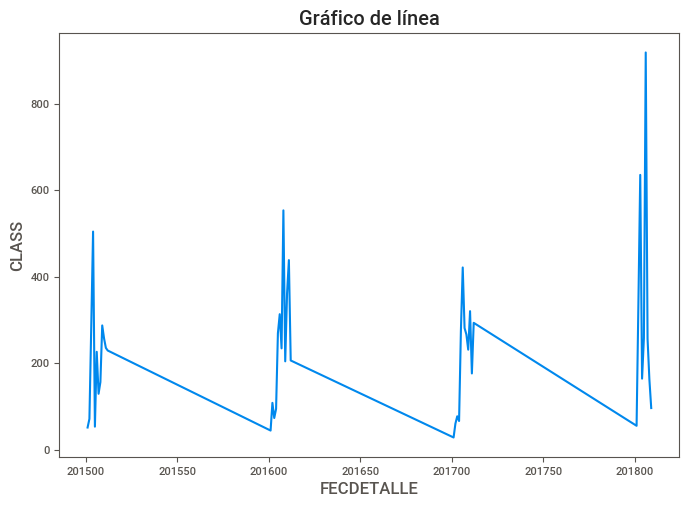

In [90]:
import matplotlib.pyplot as plt

plt.plot(data_fin_X['FECDETALLE'], data_fin_X['CLASS'])
plt.xlabel('FECDETALLE')
plt.ylabel('CLASS')
plt.title('Gráfico de línea')
plt.show()

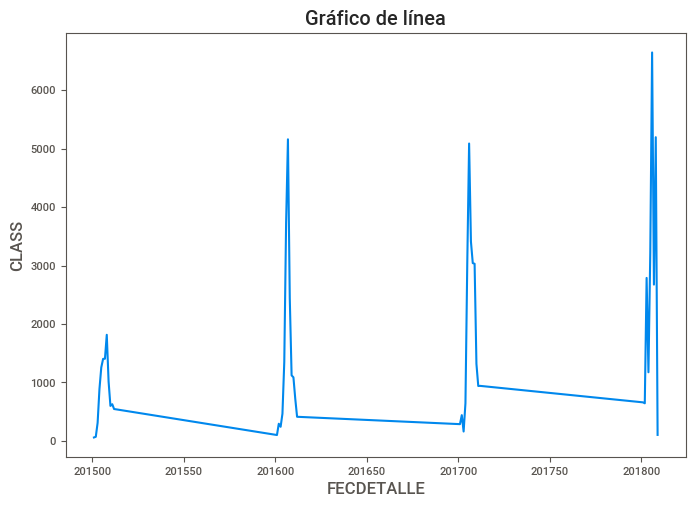

In [91]:
data_prueba_X = data[['FECDETALLE','CODIGO_SAP','CLASS']].loc[data['CODIGO_SAP']=='10INPY-008AMM0-SC005']
plt.plot(data_prueba_X['FECDETALLE'], data_prueba_X['CLASS'])
plt.xlabel('FECDETALLE')
plt.ylabel('CLASS')
plt.title('Gráfico de línea')
plt.show()



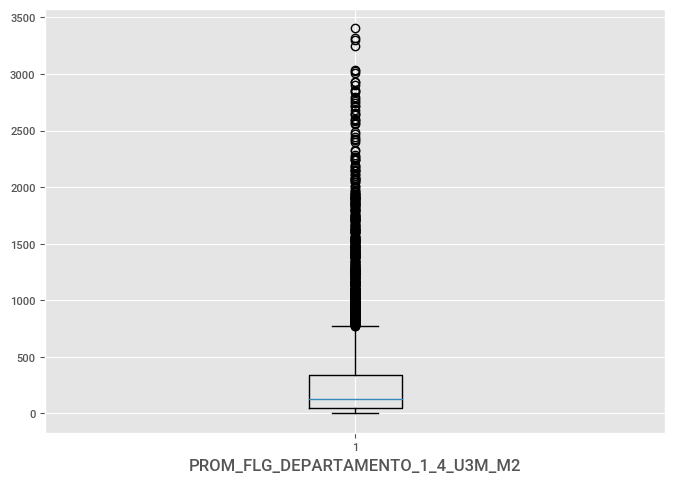

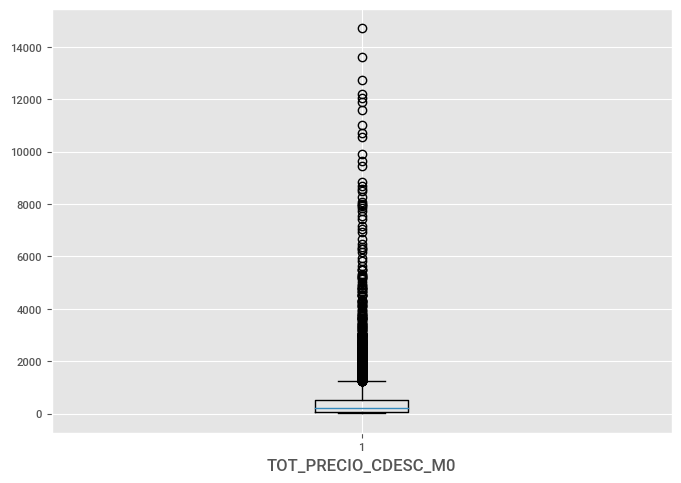

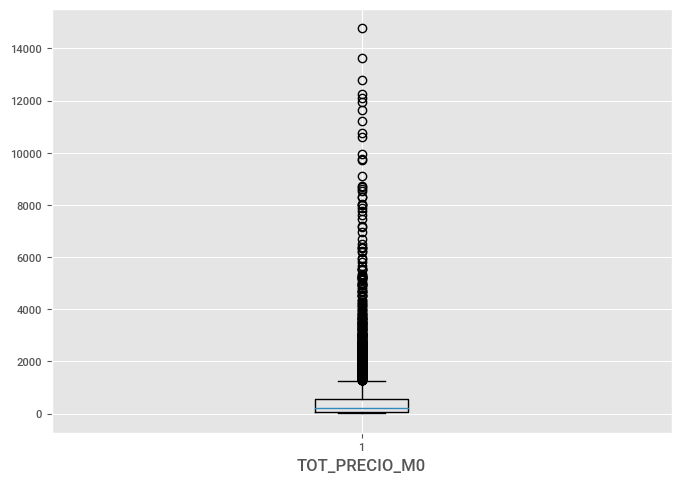

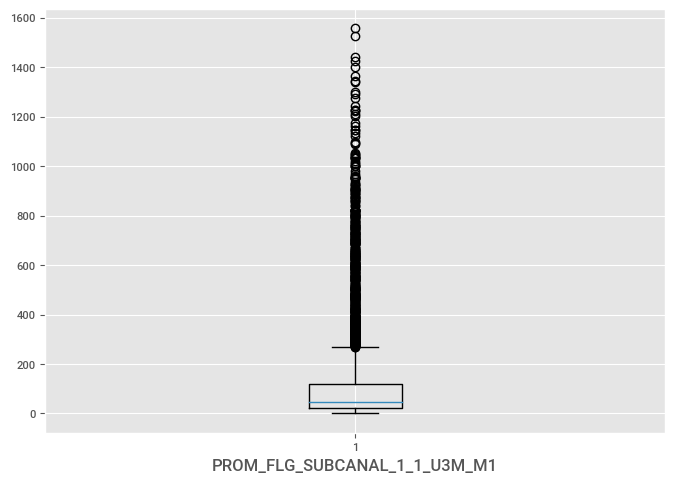

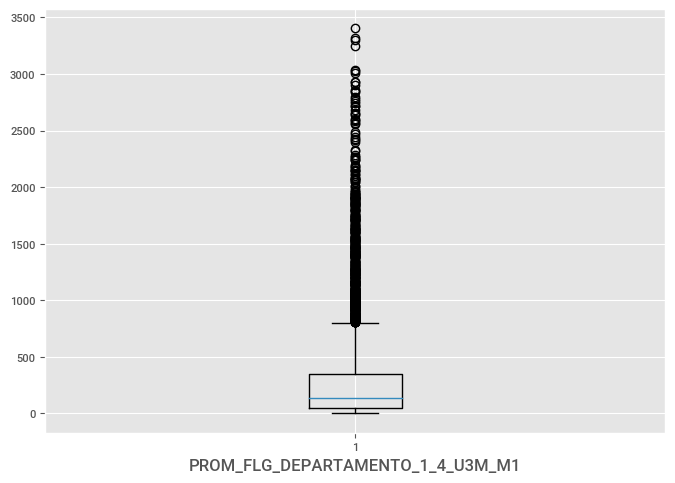

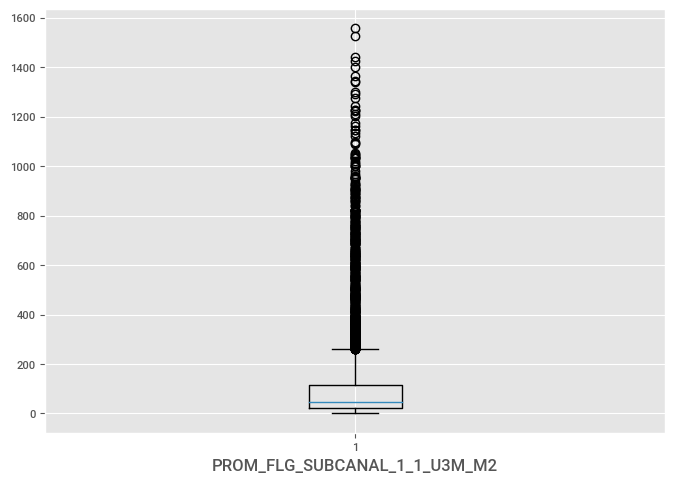

In [92]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

for i in inputs_num:
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

In [93]:
from scipy import stats 
import pandas as pd


data_ca = {'Variable' : inputs_num,
       'Coeficiente_Asim' : stats.skew(data[inputs_num])}
asim = pd.DataFrame(data_ca)
asim

,Variable,Coeficiente_Asim
0,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,2.876120
1,TOT_PRECIO_CDESC_M0,5.793763
2,TOT_PRECIO_M0,5.588627
3,PROM_FLG_SUBCANAL_1_1_U3M_M1,3.203722
4,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,2.817616
5,PROM_FLG_SUBCANAL_1_1_U3M_M2,3.258753


In [94]:
res_data_num = data[inputs_num].describe().transpose()
res_data_num['cv'] = res_data_num.iloc[:,2] / res_data_num.iloc[:,1] * 100
res_data_num

,count,mean,std,min,25%,50%,75%,max,cv
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,4680.0,301.257001,445.396766,0.000,52.173453,131.953333,341.874285,3402.266667,147.846113
TOT_PRECIO_CDESC_M0,4680.0,529.999730,1051.235491,4.508,69.536500,197.307600,537.780145,14701.436130,198.346420
TOT_PRECIO_M0,4680.0,548.231868,1084.551578,4.900,71.843050,203.608800,550.784500,14762.849590,197.827168
PROM_FLG_SUBCANAL_1_1_U3M_M1,4680.0,118.083333,190.079855,0.000,21.000000,47.000000,120.000000,1556.000000,160.970943
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,4680.0,305.886334,448.918507,0.000,50.200000,132.476667,351.735613,3402.266667,146.759909
PROM_FLG_SUBCANAL_1_1_U3M_M2,4680.0,116.567094,188.845758,0.000,22.000000,47.000000,117.000000,1556.000000,162.006062


In [98]:
data.head()

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
0,201501,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,156.99835,138.92,47.0,132.476667,47.0,641
1,201502,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,124.06427,120.87,47.0,132.476667,47.0,148
2,201503,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,278.67054,273.85,47.0,132.476667,47.0,524
3,201504,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,254.20764,252.21,47.0,132.476667,47.0,600
4,201505,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,243.58710,264.37,112.0,396.900000,47.0,186


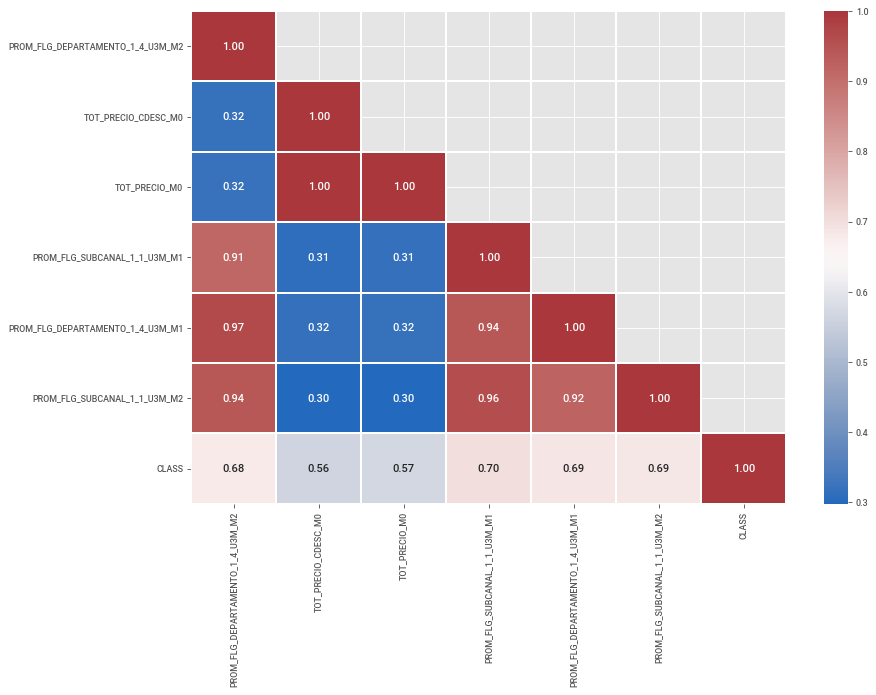

In [99]:
df = data.drop('FECDETALLE', axis=1)
#Calculo de Correlación
corr = df.corr(method='pearson')

#Creamos una mascara para ver la correlación en un solo lado
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)]=True

#Plot the heatmap correlation
plt.figure(figsize=(12,8),dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap = 'vlag', fmt='.2f', linewidths=0.2)
plt.show()

In [100]:
inputs_num_prueba = ['TOT_PRECIO_CDESC_M0',
       'TOT_PRECIO_M0', 'PROM_FLG_SUBCANAL_1_1_U3M_M1',
       'PROM_FLG_DEPARTAMENTO_1_4_U3M_M1']

Preparación de datos

In [101]:
data.head()

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
0,201501,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,156.99835,138.92,47.0,132.476667,47.0,641
1,201502,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,124.06427,120.87,47.0,132.476667,47.0,148
2,201503,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,278.67054,273.85,47.0,132.476667,47.0,524
3,201504,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,254.20764,252.21,47.0,132.476667,47.0,600
4,201505,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,243.58710,264.37,112.0,396.900000,47.0,186


In [102]:
import pandas
# One-hot encode categorical features
data = pandas.get_dummies(data, columns=["TALLA", "COLORES","TIPO"], drop_first=False)

print(data.head())

   FECDETALLE            CODIGO_SAP  PROM_FLG_DEPARTAMENTO_1_4_U3M_M2  \
0      201501  10CLPY-1900LL0-SC001                        131.953333   
1      201502  10CLPY-1900LL0-SC001                        131.953333   
2      201503  10CLPY-1900LL0-SC001                        131.953333   
3      201504  10CLPY-1900LL0-SC001                        131.953333   
4      201505  10CLPY-1900LL0-SC001                        131.953333   

   TOT_PRECIO_CDESC_M0  TOT_PRECIO_M0  PROM_FLG_SUBCANAL_1_1_U3M_M1  \
0            156.99835         138.92                          47.0   
1            124.06427         120.87                          47.0   
2            278.67054         273.85                          47.0   
3            254.20764         252.21                          47.0   
4            243.58710         264.37                         112.0   

   PROM_FLG_DEPARTAMENTO_1_4_U3M_M1  PROM_FLG_SUBCANAL_1_1_U3M_M2  CLASS  \
0                        132.476667                       

In [105]:
data_inputs = data.iloc[:, 2:8].join(data.iloc[:, 9:])
data_inputs.head()

,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,TALLA_L,TALLA_M,TALLA_S,TALLA_XL,...,COLORES_GRAFITO,COLORES_HUMO,COLORES_MARRON BAG,COLORES_NEGRO,COLORES_PIEL,COLORES_SMOKE,COLORES_VISON,TIPO_CPT,TIPO_SIN_INFO,TIPO_SPT
0,131.953333,156.99835,138.92,47.0,132.476667,47.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,131.953333,124.06427,120.87,47.0,132.476667,47.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,131.953333,278.67054,273.85,47.0,132.476667,47.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,131.953333,254.20764,252.21,47.0,132.476667,47.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,131.953333,243.58710,264.37,112.0,396.900000,47.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(data_inputs)
transformer
RobustScaler()

RobustScaler()

In [108]:
data_inputs_s = transformer.transform(data_inputs)

In [109]:
inputs = data_inputs.columns.tolist()

In [110]:
data_inputs_s = pd.DataFrame(data_inputs_s,columns=inputs)

In [111]:
data_inputs_s.head(3)

,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,TALLA_L,TALLA_M,TALLA_S,TALLA_XL,...,COLORES_GRAFITO,COLORES_HUMO,COLORES_MARRON BAG,COLORES_NEGRO,COLORES_PIEL,COLORES_SMOKE,COLORES_VISON,TIPO_CPT,TIPO_SIN_INFO,TIPO_SPT
0,0.0,-0.086086,-0.135066,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,-0.156421,-0.172753,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.173762,0.146659,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [113]:
data.head(2)

,FECDETALLE,CODIGO_SAP,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS,TALLA_L,...,COLORES_GRAFITO,COLORES_HUMO,COLORES_MARRON BAG,COLORES_NEGRO,COLORES_PIEL,COLORES_SMOKE,COLORES_VISON,TIPO_CPT,TIPO_SIN_INFO,TIPO_SPT
0,201501,10CLPY-1900LL0-SC001,131.953333,156.99835,138.92,47.0,132.476667,47.0,641,1,...,0,0,0,0,0,0,0,0,0,1
1,201502,10CLPY-1900LL0-SC001,131.953333,124.06427,120.87,47.0,132.476667,47.0,148,1,...,0,0,0,0,0,0,0,0,0,1


In [115]:
data_fin = pd.concat([data[['FECDETALLE', 'CODIGO_SAP']], data_inputs_s, data['CLASS']], axis=1)
data_fin.head(3)

,FECDETALLE,CODIGO_SAP,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,TALLA_L,TALLA_M,...,COLORES_HUMO,COLORES_MARRON BAG,COLORES_NEGRO,COLORES_PIEL,COLORES_SMOKE,COLORES_VISON,TIPO_CPT,TIPO_SIN_INFO,TIPO_SPT,CLASS
0,201501,10CLPY-1900LL0-SC001,0.0,-0.086086,-0.135066,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,641
1,201502,10CLPY-1900LL0-SC001,0.0,-0.156421,-0.172753,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,148
2,201503,10CLPY-1900LL0-SC001,0.0,0.173762,0.146659,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,524


In [116]:
data_fin_2_X = data_fin[['FECDETALLE','CODIGO_SAP','CLASS']].loc[data_fin['CODIGO_SAP']=='10CLPY-2000LL0-SC001']
data_fin_2_X

,FECDETALLE,CODIGO_SAP,CLASS
1958,201501,10CLPY-2000LL0-SC001,51
1959,201502,10CLPY-2000LL0-SC001,71
1960,201503,10CLPY-2000LL0-SC001,284
1961,201504,10CLPY-2000LL0-SC001,504
1962,201505,10CLPY-2000LL0-SC001,53
1963,201506,10CLPY-2000LL0-SC001,226
1964,201507,10CLPY-2000LL0-SC001,129
1965,201508,10CLPY-2000LL0-SC001,156
1966,201509,10CLPY-2000LL0-SC001,287
1967,201510,10CLPY-2000LL0-SC001,257


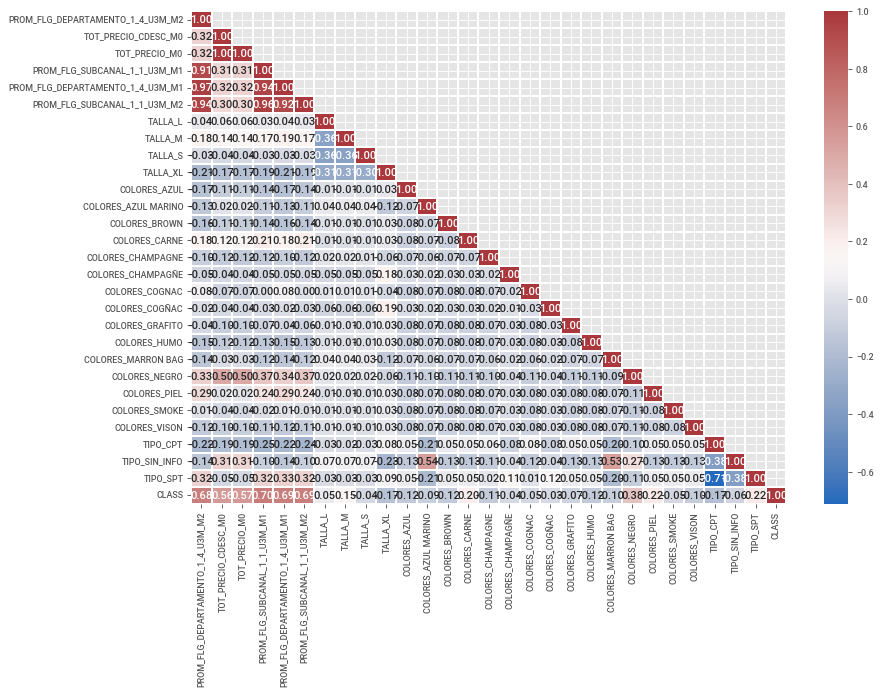

In [117]:
df = data_fin.drop('FECDETALLE', axis=1)
#Calculo de Correlación
corr = df.corr(method='pearson')

#Creamos una mascara para ver la correlación en un solo lado
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)]=True

#Plot the heatmap correlation
plt.figure(figsize=(12,8),dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap = 'vlag', fmt='.2f', linewidths=0.2)
plt.show()

In [118]:
data_fin.columns.values

array(['FECDETALLE', 'CODIGO_SAP', 'PROM_FLG_DEPARTAMENTO_1_4_U3M_M2',
       'TOT_PRECIO_CDESC_M0', 'TOT_PRECIO_M0',
       'PROM_FLG_SUBCANAL_1_1_U3M_M1', 'PROM_FLG_DEPARTAMENTO_1_4_U3M_M1',
       'PROM_FLG_SUBCANAL_1_1_U3M_M2', 'TALLA_L', 'TALLA_M', 'TALLA_S',
       'TALLA_XL', 'COLORES_AZUL', 'COLORES_AZUL MARINO', 'COLORES_BROWN',
       'COLORES_CARNE', 'COLORES_CHAMPAGNE', 'COLORES_CHAMPAGÑE',
       'COLORES_COGNAC', 'COLORES_COGÑAC', 'COLORES_GRAFITO',
       'COLORES_HUMO', 'COLORES_MARRON BAG', 'COLORES_NEGRO',
       'COLORES_PIEL', 'COLORES_SMOKE', 'COLORES_VISON', 'TIPO_CPT',
       'TIPO_SIN_INFO', 'TIPO_SPT', 'CLASS'], dtype=object)

In [119]:
n = data_fin.shape[1]

In [120]:
X_train = data_fin.loc[data_fin['FECDETALLE']<201801]
y_train = X_train.iloc[:,-1].values
n_cols = X_train.iloc[:,2:(n-1)].columns.tolist()
X_train = X_train.iloc[:,2:(n-1)].values

In [121]:
n_cols

['PROM_FLG_DEPARTAMENTO_1_4_U3M_M2',
 'TOT_PRECIO_CDESC_M0',
 'TOT_PRECIO_M0',
 'PROM_FLG_SUBCANAL_1_1_U3M_M1',
 'PROM_FLG_DEPARTAMENTO_1_4_U3M_M1',
 'PROM_FLG_SUBCANAL_1_1_U3M_M2',
 'TALLA_L',
 'TALLA_M',
 'TALLA_S',
 'TALLA_XL',
 'COLORES_AZUL',
 'COLORES_AZUL MARINO',
 'COLORES_BROWN',
 'COLORES_CARNE',
 'COLORES_CHAMPAGNE',
 'COLORES_CHAMPAGÑE',
 'COLORES_COGNAC',
 'COLORES_COGÑAC',
 'COLORES_GRAFITO',
 'COLORES_HUMO',
 'COLORES_MARRON BAG',
 'COLORES_NEGRO',
 'COLORES_PIEL',
 'COLORES_SMOKE',
 'COLORES_VISON',
 'TIPO_CPT',
 'TIPO_SIN_INFO',
 'TIPO_SPT']